In [2]:
import tqdm
from preprocessing import *
import tigre.algorithms as algs
import tigre.utilities.gpu as gpu
import os

import numpy as np
import matplotlib.pyplot as plt

import data_making as dm
%reload_ext autoreload
%autoreload 2

In [23]:
root = r"F:\RawProjections\KRT20230315_samplingV3_hourglass"
expname = r"hourglassV3_25"
oroot = r"F:\ProcessedProjections"
numProj = 25
nrevs = 75
correction =None
geometry = fr"{os.path.join(root, 'hourglass_step0.nsiprg')}"
roi = None
rot = 0

In [24]:
preprocess = DynamicProjectionsEQNR(
        root,
        expname,
        oroot,
        # args.oname,
        numProj,
        nrevs=nrevs,
        correction_parent=correction,
        geometry=geometry,
        roi=roi,
        rotation=rot,
    )

F:\RawProjections\KRT20230315_samplingV3_hourglass\hourglass_step0.nsiprg
Rotation: 270.0
Except when reading angles!!!


In [16]:
cor = preprocess.find_centre_rotation()
print(cor)

100%|██████████| 201/201 [00:53<00:00,  3.77it/s]

Centre offset: 0.0
0.0


In [17]:
print(cor)

0.0


In [18]:
preprocess()

100%|██████████| 75/75 [54:24<00:00, 43.53s/it]


In [4]:
root_processed = r"F:\ProcessedProjections"
rec_oroot = r"F:\ReconstructionDatasets"
rec_oname = "hourglassV3_25_testing"
rec_class = dm.EquinorDynamicCT(root_processed, expname, rec_oroot, rec_oname)

In [17]:
print(rec_class)

# with open(os.path.join(rec_class.root, f"{rec_class.name}.pkl"), "rb") as g:
#             geo = pkl.load(g)

geo_class = IndustrialGeometryEQNR()
geo = geo_class()

geo.nDetector = np.array([1024, 700])
geo.sDetector = geo.nDetector * geo.dDetector
geo.nVoxel = np.array([1024, 700, 700])
geo.sVoxel = geo.nVoxel * geo.dVoxel
geo.COR = 0
# 

with open(os.path.join(rec_class.root, f"{rec_class.name}.pkl"), "wb+") as g:
            # geo = pkl.load(g)
            pkl.dump(geo, g)

In [18]:
rec_0 = rec_class.reconstruct_idx(0)

In [55]:
rec_settings = rec_class.make_projection_group(0, 21)
rec2 = rec_class.reconstruct_group(*rec_settings)

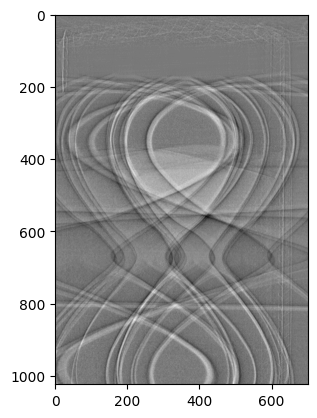

In [19]:
plt.imshow(rec_0[:,:,512], cmap="gray")
plt.show()
#Centre of rotation has to do with cropping of projections?

In [43]:
import h5py

with h5py.File(os.path.join(oroot, expname)+".h5") as f:
    projs = [np.array(f["projections"][str(i).zfill(5)]) for i in range(10)]#0:10]
    angles = [np.array(f["angles"][str(i).zfill(5)]) for i in range(10)]#[0:10]

In [46]:
print(angles[0])
print(angles[1])

[  0.   14.4  28.8  43.2  57.6  72.   86.4 100.8 115.2 129.6 144.  158.4
 172.8 187.2 201.6 216.  230.4 244.8 259.2 273.6 288.  302.4 316.8 331.2
 345.6]
[365.5003 351.1003 336.7003 322.3003 307.9003 293.5003 279.1003 264.7003
 250.3003 235.9003 221.5003 207.1003 192.7003 178.3003 163.9003 149.5003
 135.1003 120.7003 106.3003  91.9003  77.5003  63.1003  48.7003  34.3003
  19.9003]


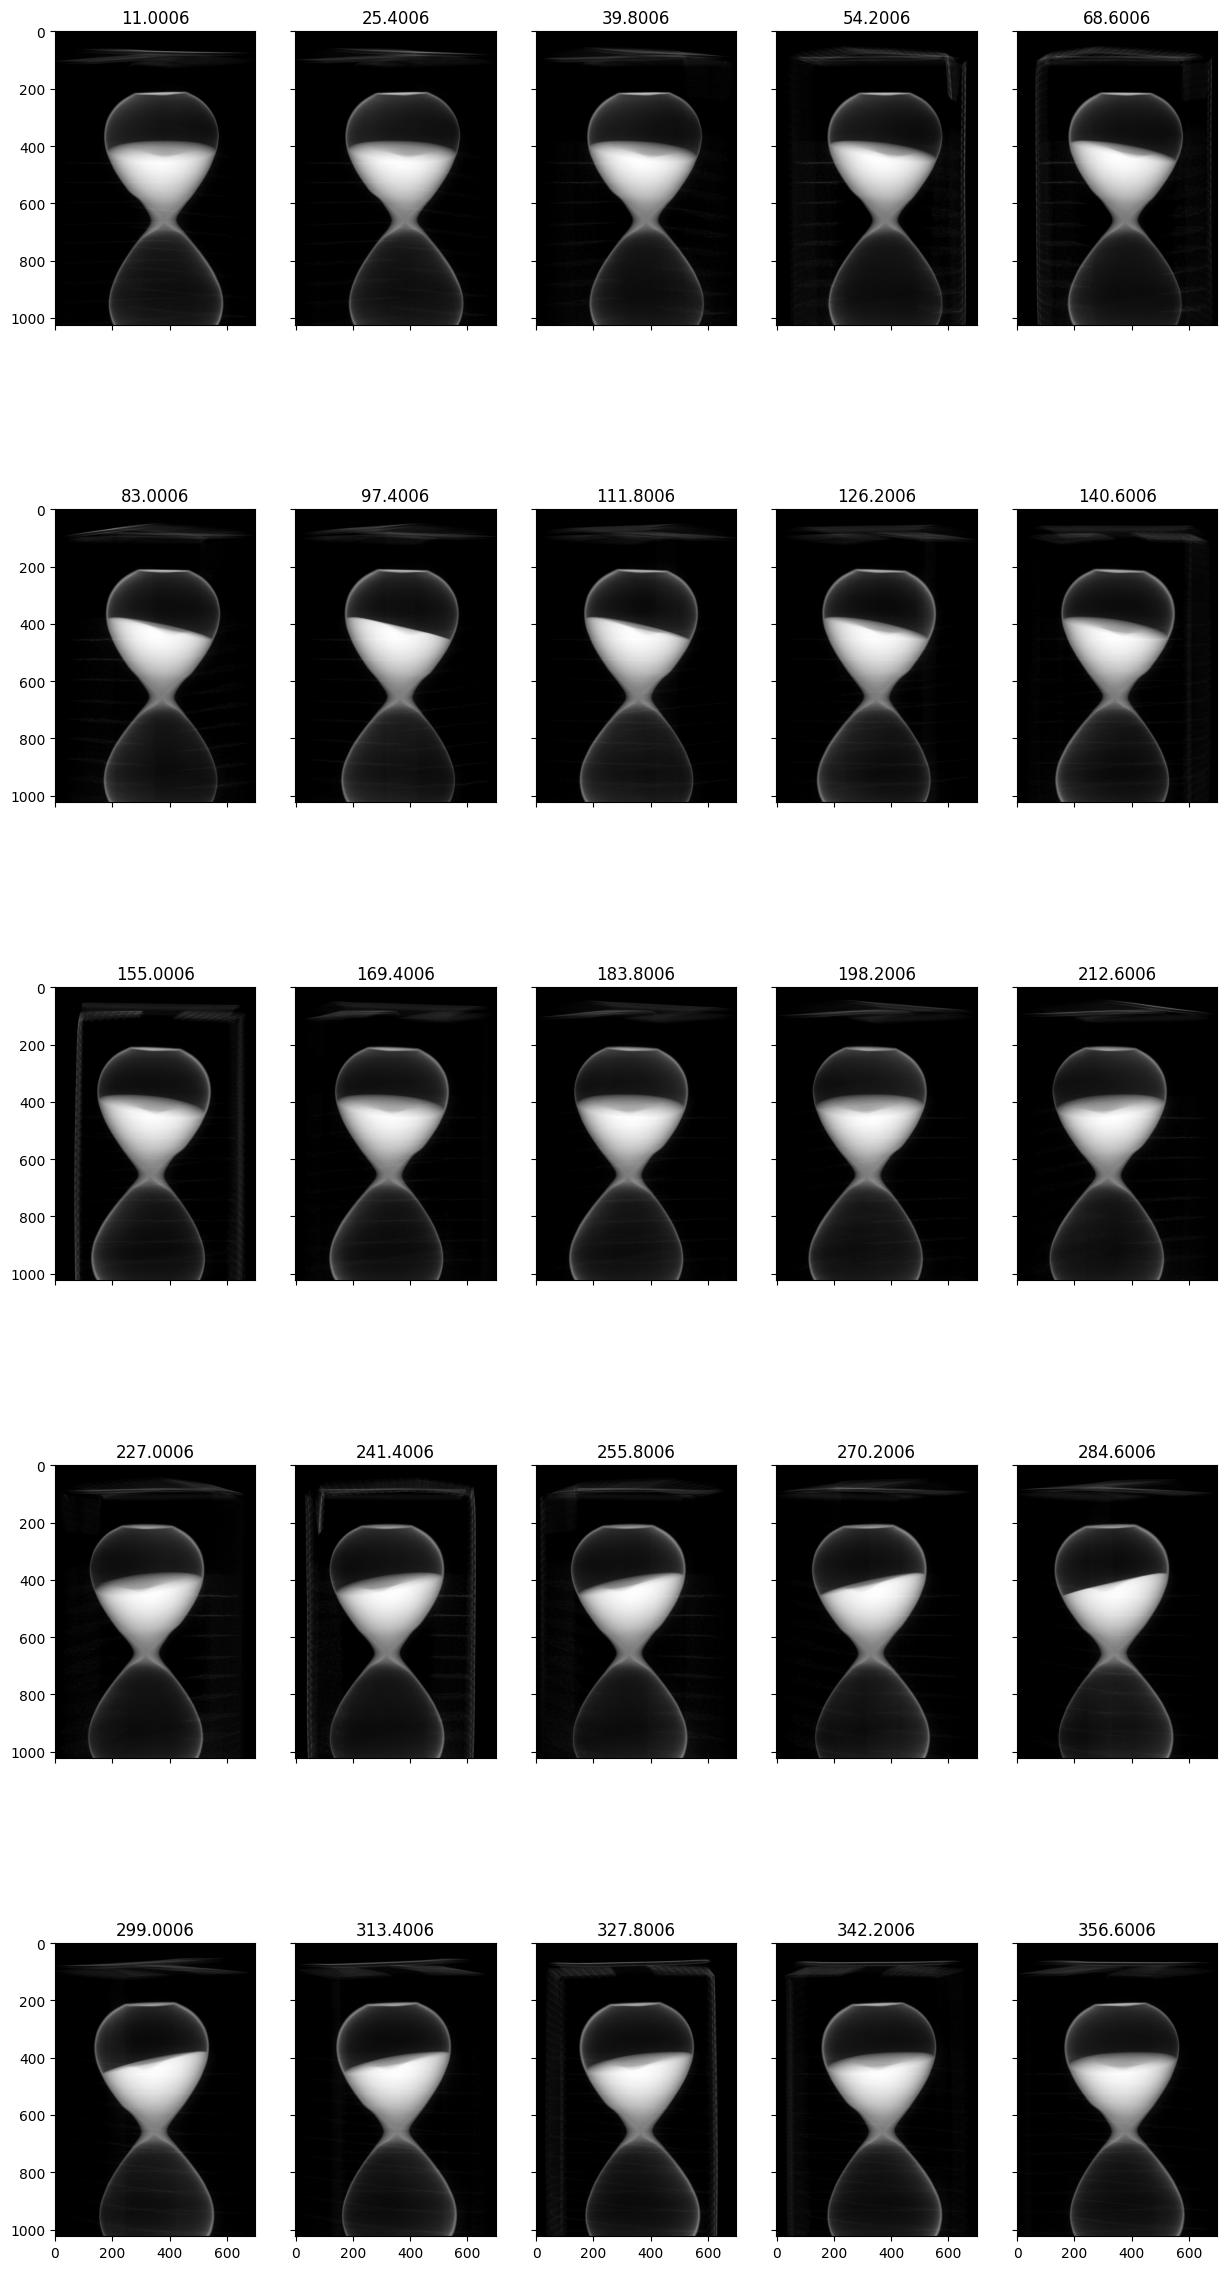

In [54]:
fig, ax = plt.subplots(5,5, figsize=(15,30), sharex=True, sharey=True)
ax = ax.reshape(-1)

for i, axi in enumerate(ax):
    axi.imshow(projs[2][i], cmap="gray")
    axi.set_title(angles[2][i])

plt.show()